# COSC 437 Week 2 Exploratory Data Analysis and Linear Regression

## Explore and Organize Data with Pandas

In [1]:
import pandas as pd
# a data frame is a collection of Series

# create a data frame from a dictionary. Notice that the values are lists
my_dict = {"language":["Python","C","Java","GO","R","SQL","PHP","C++"],
       "score":[4.1,4.4,3.9,1.6,3.0,3.5,2.8,3.2]}
df = pd.DataFrame(my_dict)
# print or just run the expression (supported by Jupyter Notebook and IPython)
df

,language,score
0,Python,4.1
1,C,4.4
2,Java,3.9
3,GO,1.6
4,R,3.0
5,SQL,3.5
6,PHP,2.8
7,C++,3.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  8 non-null      object 
 1   score     8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
df = pd.read_csv("titanic.csv")
# data from https://www.kaggle.com/c/titanic/data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [6]:
# select a field
df["Age"]

# select multiple fields
df[["Name", "Age"]]



,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [7]:
# by default, we have a generated index
df.head(10)

df.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [8]:
# But we can set a different column to be the index
df_name_indexed = df.set_index('Name')

df_name_indexed.head()

# then we can locate the data easily
df_name_indexed.loc["Moran, Mr. James"]


PassengerId         6
Survived            0
Pclass              3
Sex              male
Age               NaN
SibSp               0
Parch               0
Ticket         330877
Fare           8.4583
Cabin             NaN
Embarked            Q
Name: Moran, Mr. James, dtype: object

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling missing values:

In [10]:
# The missing values in Age
df['Age'].isnull()

# Set the missing ages to average age
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Age']

C:\Users\300346195\AppData\Local\Temp\ipykernel_6448\4224013166.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
# to get a numpy.ndarray from a DataFrame:
my_arr = df[["Name", "Age"]].to_numpy()


## Basic Plotting with `matplotlib`

### 2D Plotting

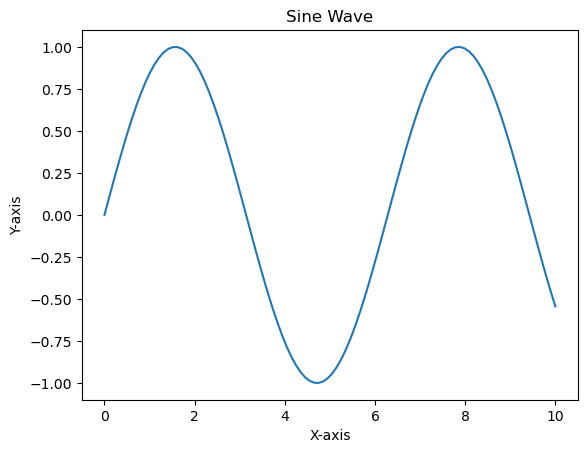

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data.
x = np.linspace(0, 10, 100)  # 100 points evenly spaced between 0 and 10
y = np.sin(x)

# Create a basic line plot.
plt.plot(x, y)

# Add a title, and labels for the x-axis and y-axis.
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()


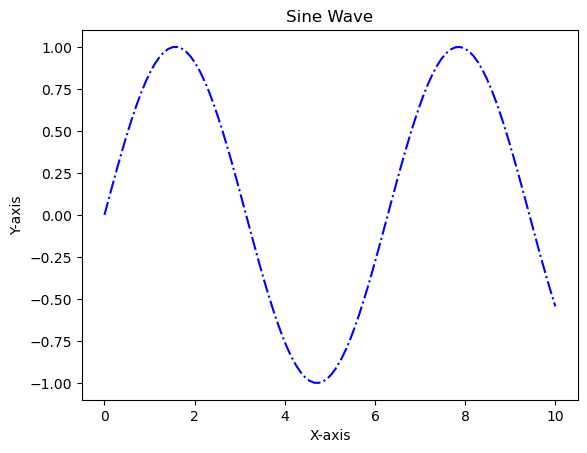

In [13]:
# Change the style
plt.plot(x, y, '-.b')

# Add a title, and labels for the x-axis and y-axis.
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

# fmt = '[marker][line][color]'
# For a full list of line styles and marker shapes:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

C:\Users\300346195\AppData\Local\Temp\ipykernel_6448\4015170258.py:4: RuntimeWarning: divide by zero encountered in log
  y_log = np.log(x)


Text(0, 0.5, 'Y-axis')

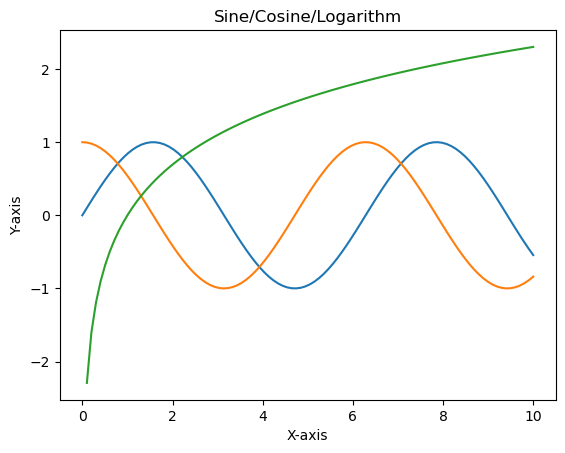

In [14]:
# Multiple lines
y_sin = y
y_cos = np.cos(x)
y_log = np.log(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.plot(x, y_log)

plt.title('Sine/Cosine/Logarithm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')



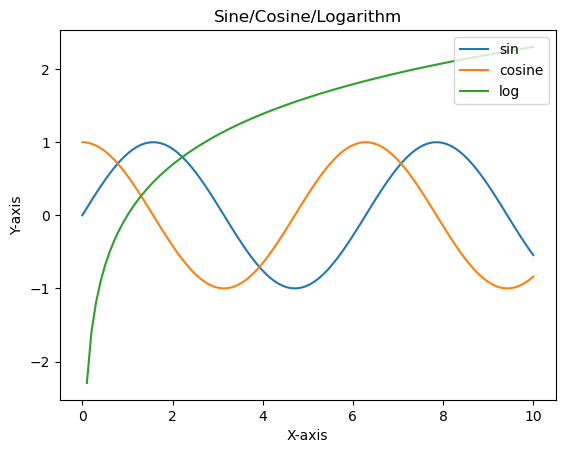

In [15]:
# Adding legend
plt.plot(x, y_sin, label="sin")
plt.plot(x, y_cos, label="cosine")
plt.plot(x, y_log, label="log")

plt.title('Sine/Cosine/Logarithm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend(loc='upper right')
plt.show()

### Statistical Plotting

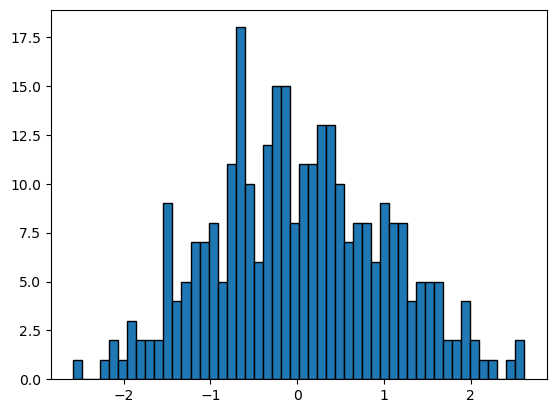

In [16]:
# Randomly generate 300 values
values = np.random.normal(loc = 0.0,scale=1.0,size=300)
plt.hist(values, bins = 50, edgecolor="black")
plt.show()

# read more https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

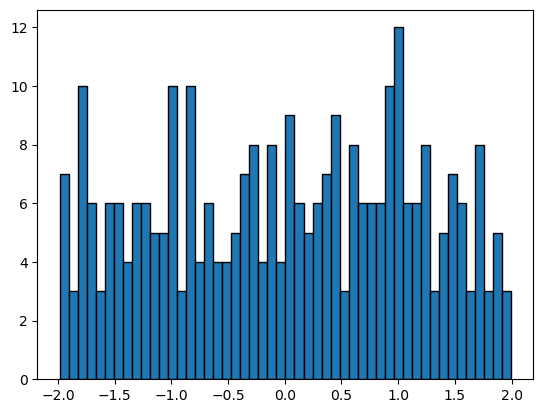

In [17]:
# uniformly generated values
values_2 = np.random.uniform(-2, 2, 300)
plt.hist(values_2, bins= 50, edgecolor="black")
plt.show()

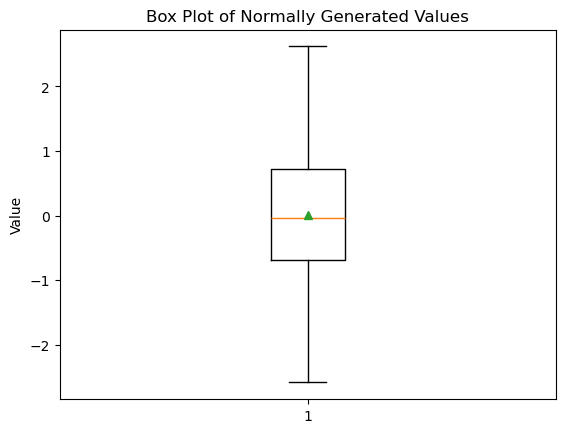

In [18]:
# Boxplot of the data
plt.boxplot(values, showmeans=True)
plt.title('Box Plot of Normally Generated Values')
plt.ylabel('Value')
plt.show()

How to read a boxplot:

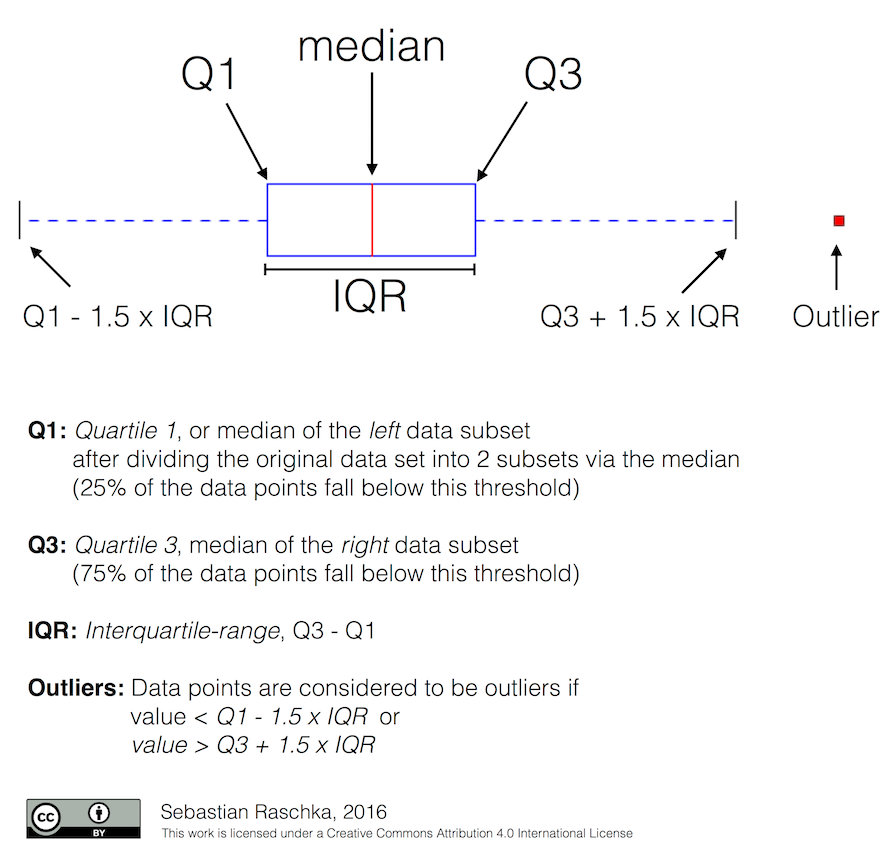


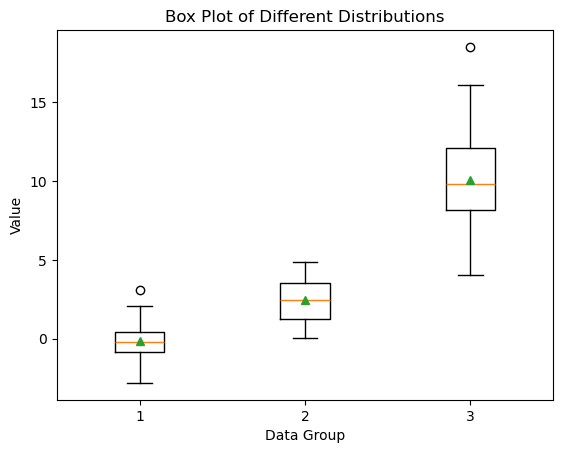

In [19]:
data1 = np.random.normal(0, 1, 100)  # Normal distribution
data2 = np.random.uniform(0, 5, 100)  # Uniform distribution 
data3 = np.random.normal(10, 3, 100)  # Another normal distribution

# Combine data into a list
data_list = [data1, data2, data3]

# Create a box plot
plt.boxplot(data_list, vert=True, showmeans=True)

# Add titles and labels
plt.title('Box Plot of Different Distributions')
plt.xlabel('Data Group')
plt.ylabel('Value')

# Show the plot
plt.show()



## Supervised Learning Problems
Supervised learning is a type of machine learning where an algorithm learns from labeled training data. The main goal is to make predictions on unseen data based on the knowledge it gains from the labeled data. 
- Input (X): Features used to make predictions (e.g., size of a house).
- Output (y): The label or result (e.g., price of a house).
- Model: A mathematical function that maps X to Y.
- Training: The process of learning the mapping function from data.

In [20]:
# A base class for all supervised learning models
class SupervisedLearningModel:
    def __init__(self, n_features):
        """
        Constructor for the supervised learning model class.

        Parameters:
        n_features (int): Number of features in the input data.
        """
        self.n_features = n_features

    def predict(self, X):
        """
        Predict the output based on the input data X.

        Parameters:
        X (array-like): Input data with shape (n_samples, n_features).

        Returns:
        array-like: Predicted values.
        """
        raise NotImplementedError("The predict method needs to be implemented in a subclass.")

    def train(self, X, y):
        """
        Train the model using input data X and corresponding labels y.

        Parameters:
        X (array-like): Training data with shape (n_samples, n_features).
        y (array-like): Target values with shape (n_samples,).
        
        Returns:
        None
        """
        raise NotImplementedError("The train method needs to be implemented in a subclass.")

## Real-Value Prediction (Regression Problems)
The task where the output y is continuous (real-value). 

Examples:
- Predicting house prices based on features such as size, location, and number of bedrooms.
- Estimating the amount of rainfall based on atmospheric data.
- Forecasting stock prices over time.

### Background: Bordeaux Wine
- There are significant variations in price and quality from year to year, despite the wine being produced using similar methods.
- Bordeaux wines are designed to age, making it difficult to determine their quality when first available on the market.
- Expert tasters offer predictions on which wines will turn out well.
- Could data analytics provide a new system for evaluating the quality of wine?

### Problem: Predicting Wine Quality
In March 1990, Orley Ashenfelter, an economics professor at Princeton, claimed he could predict the quality of wine without tasting it.


In [21]:
# Let's see how the data look like:
wine_data = pd.read_csv("wine.csv")
wine_data.info()

wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
 6   FrancePop    25 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.5 KB


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


Text(0.5, 1.0, 'Price vs Harvest Rain')

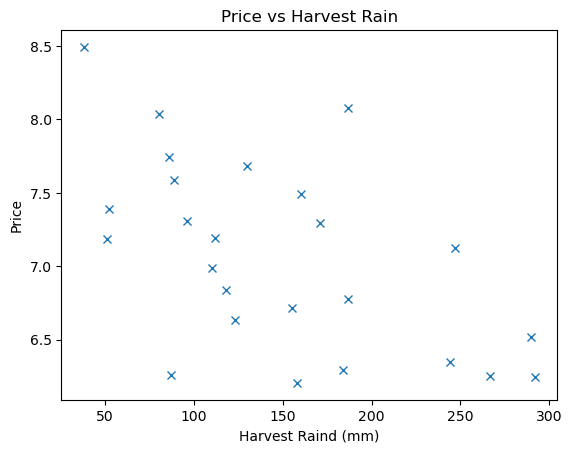

In [22]:
# Let's visualize the the relation between the price and some attributes
# First, price vs Harvest Rain (mm)
plt.plot(wine_data['HarvestRain'], wine_data['Price'], "x")
plt.xlabel("Harvest Raind (mm)")
plt.ylabel("Price")
plt.title("Price vs Harvest Rain")

Text(0.5, 1.0, 'Price vs AGST')

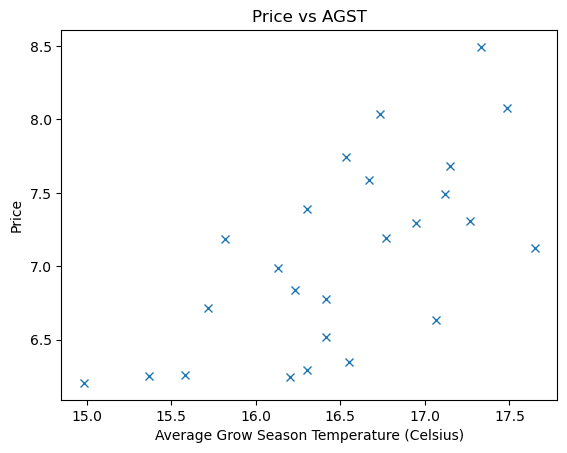

In [23]:
# Then, price vs average growing season temperature (celsius)
plt.plot(wine_data['AGST'], wine_data['Price'], "x")
plt.xlabel("Average Grow Season Temperature (Celsius)")
plt.ylabel("Price")
plt.title("Price vs AGST")


Text(0.5, 1.0, 'Price vs Age')

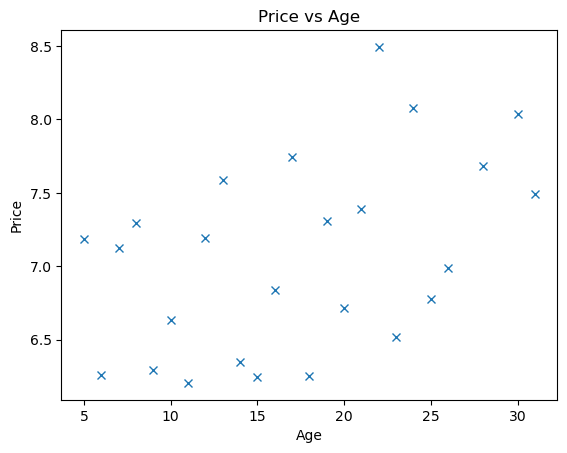

In [24]:
# Then price vs age 
plt.plot(wine_data['Age'], wine_data['Price'], "x")
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price vs Age")




## Linear Regression
Linear regression is one of the simplest supervised learning algorithms for real-value prediction.

The model is a linear function:
$$ \hat{y} = f(\mathbf x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +...+\beta _n x_n $$
where 
- $\hat{y}$ is the predicted real-value label,
- $x_1$...$x_n$ are the features,
- $\beta_1...\beta_n$ are the coefficients (also known as the weights) associated with the features,
- $\beta_0$ is the intercept

Let $x_0=1$. By representing the features and weights in vectors:
- $\mathbf{x} = [x_0, x_1, x_2, ... , x_n]$
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \beta_2, ... , \beta_n]$
  
we can rewrite the predictive function as 
$$\hat{y} = \mathbf{x} \cdot \boldsymbol{\beta}$$
or more commonly
$$\hat{y} = \mathbf{x}^\intercal \boldsymbol{\beta}$$

In [25]:
import numpy as np

class LinearRegression(SupervisedLearningModel):
    def __init__(self, n_features):
        super().__init__(n_features)
        self.weights = np.zeros((n_features + 1, 1))  # Include bias as part of the weights

    # Predict the output using the linear model.
    def predict(self, X):

        # Add a column of ones to X for the bias term
        X_augmented = np.ones((X.shape[0], X.shape[1]+1))
        X_augmented[:, 1:] = X
        # or more efficiently: X_augmented = np.c_[np.ones(X.shape[0]), X]
        
        return np.matmul(X_augmented, self.weights)

    def train(self, X, y):
        pass # To be implemented

In [26]:
# Let's first consider a model that uses only one variable
lr = LinearRegression(1)
lr.weights = np.array([[-3.3], [0.62]])
predicted = lr.predict(wine_data['AGST'].to_numpy().reshape(-1,1))
print(predicted)

[[7.312354]
 [7.074646]
 [7.333   ]
 [6.702646]
 [6.878354]
 [7.539646]
 [6.878354]
 [7.446646]
 [6.806   ]
 [6.444354]
 [7.405354]
 [6.227354]
 [6.950646]
 [6.764646]
 [6.744   ]
 [6.961   ]
 [7.033354]
 [7.095354]
 [5.989646]
 [7.281354]
 [6.806   ]
 [7.209   ]
 [7.643   ]
 [6.361646]
 [6.506354]]


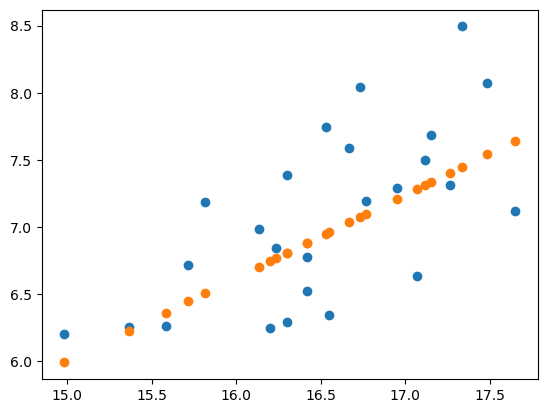

In [27]:
# Let's see where those predictions are
plt.plot(wine_data["AGST"], wine_data["Price"], "o")
plt.plot(wine_data["AGST"], predicted, "o")

### Interpretation of the Weights/Coefficients
- $\beta_j > 0$: Positive relationship between $x_j$ and the prediction $\hat y$ (as $x_j$ increases, $\hat y$ increases).  
-  $\beta_j < 0$: Negative relationship between $x_j$ and the prediction $\hat y$ (as $x_j$ decreases, $\hat y$ decreases).
-  Magnitude of a coefficient: how strong the impact (how steep the slope) is.

### The error function of Linear Regression 

The predicted value of record $i$ is $\hat y_i$:
$$\hat y_i = \mathbf{x}_i^\intercal \mathbf{w}$$
But there is a difference between the actual value $y_i$ and $\hat y_i$:
$$y_i = \hat y_i + \epsilon_i = \mathbf{x}^\intercal_i \mathbf{w} + \epsilon_i$$

We want to choose the correct weights, $\mathbf{w}$, so that the errors are minimized. Ideally, if $\epsilon_i = 0$ for all $i$, then that would be a perfect prediction, but obviously this won't be possible realistically.

Also, we cannot minimize the errors one by one-when we are changing the weights, we are changing the weights for all data points, and therefore changing all the errors. What we are going to do, is to define an *error function* $J(\mathbf{w})$ that measures the overall errors at once. $$\min_\mathbf{w}J(\mathbf{w})$$

How do we define the overall error function? For linear regression, the error function is defined as: $$J(\mathbf{w}) = \sum_{i=1}^m \epsilon_i^2 = \sum_{i=1}^m (y_i - \hat y_i)^2$$

This error function is known as *Sum of Squared Error* or *SSE*. Minimizing SSE is known as the *Ordinary Least Squares* or *OLS* method. Notice that the error function may be defined differently but the minimization still gives OLS. For example:
- Mean Squared Error (MSE): $$\mathrm{MSE} = \frac{\mathrm{SSE}}{m}$$
- Root Mean Squared Error: $$\mathrm{RMSE} = \sqrt{\frac{\mathrm{SSE}}{m}}$$

Why SSE, though?
- Statistical properties: by assuming a normal distribution, OLS maximizes the likelihood
- Computational properties: easy to solve


In [28]:
# Calculate SSE
def sse(y, yhat):
    return ((y - yhat)**2).sum()

# Calculate MSE
def mse(y, yhat):
    return sse(y, yhat) / y.size

# Calculate RMSE
def rmse(y, yhat):
    return np.sqrt(mse(y, yhat))

print(sse(wine_data['Price'].to_numpy().reshape(-1,1), predicted))
print(mse(wine_data['Price'].to_numpy().reshape(-1,1), predicted))
print(rmse(wine_data['Price'].to_numpy().reshape(-1,1), predicted))

6.169252936487999
0.24677011745951996
0.4967596173799959


### Identity Matrix 
The identity matrix, denoted as $\mathbf{I}$, is a square matrix with ones on the diagonal and zeros elsewhere.
$$\mathbf{I} = 
    \begin{bmatrix}
    1 & 0 & 0 & \cdots & 0 \\
    0 & 1 & 0 & \cdots & 0 \\
    0 & 0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & 1
    \end{bmatrix}$$

In matrix multiplication, an identity matrix resembles a 1 in numerical multiplication. If $\mathbf A $ is an $ m \times n $ matrix, then:
$$
    \mathbf A \times \mathbf I_n = \mathbf A \quad \text{and} \quad \mathbf I_m \times \mathbf A = \mathbf A
$$

### Matrix Inverse
The inverse of a **square** matrix $\mathbf A$, denoted $ \mathbf A^{-1}$, is a matrix such that:
$$\mathbf A \times\mathbf  A^{-1} = \mathbf A^{-1} \times \mathbf A =\mathbf  I$$
Things to note:
- Only square matrice has an inverse.
- Not all square matrices have an inverse. (Doesn't happen very often.)
- Calculating the inverse is quite computationally expensive. $O(n^3)$ with $n$ being the width/height of the matrix.

A linear system can be solved by re-writing the equations in matrix form and finding the inverse. For example:
$$
\begin{aligned}
3x_1 + 4x_2 &= 11\\
5x_1 - x_2 &= 3
\end{aligned}
$$
Let 
- $\mathbf{A} = \begin{bmatrix} 3 & 4 \\ 5& -1 \end{bmatrix}$ be the coefficient matrix,
- $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ be the column vector of $x_1$ and $x_2$, and 
- $\mathbf{b} = \begin{bmatrix} 11 \\ 13 \end{bmatrix}$

Then the linear system can be re-written as
$$\mathbf{A}\mathbf{x} = \mathbf{b}$$

We multiply the inverse of $\mathbf{A}$ to the left of both sides of the equation:
$$\mathbf{A}^{-1}\mathbf{A}\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$$
Thus the solution of $\mathbf{x}$ is simply
$$\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$$

### Solution for Linear Regression
Let's consider our linear regression problem. In the best case scenario, our model will predict perfectly on all data points, i.e., $\hat y_i = y_i$ for all $i$. If we write our predictions as a vector, then
$$\mathbf X \mathbf{w} = \hat {\mathbf y} = \mathbf y$$

When the number of data points is exactly one more than the number of attributes, then the number of weights (including the bias/intercept) will be the same as the number of records. In these cases $\mathbf X$ is a square matrix, which makes it possible to have an inverse (it's possible that a square matrix is not invertible, but for matrices of real data, it rarely happens). Then the weights can be solved as 
$$ \mathbf w = \mathbf X^{-1} \mathbf y$$

However, $\mathbf X$ is not a square. It is typically very tall (many data points vs a relatively small number of features). Therefore, we don't have an inverse. What we do have, is a *pseudo-inverse* which we denote as $\mathbf X ^\dagger$. 
$$\mathbf X ^\dagger = (\mathbf X ^\intercal \mathbf X)^{-1} \mathbf X ^\intercal$$

The pseudo-inverse resembles a real inverse in many ways, for example 
$$\mathbf X ^\dagger \mathbf X  = \mathbf I$$

While $\mathbf X$ is not invertible,  $\mathbf X ^\dagger $ is. And our weights $\mathbf w$ can be computed as 
$$ \mathbf w = \mathbf X^{\dagger} \mathbf y = (\mathbf X ^\intercal \mathbf X)^{-1} \mathbf X ^\intercal \mathbf y$$

This equation, known as the *normal equation*, is the closed-form solution to linear regression. For many other machine learning algorithms, however, there are no closed-form solutions.

Take my word for now that the weights we got from normal equation are indeed the weights that minimize SSE.

Now let's finish the implementation of our linear regression algorithm:


In [29]:
class LinearRegression(SupervisedLearningModel):
    def __init__(self, n_features):
        super().__init__(n_features)
        self.weights = np.zeros((n_features + 1, 1))  # Include bias as part of the weights

    # Predict the output using the linear model.
    def predict(self, X):

        # Add a column of ones to X for the bias term
        X_augmented = np.ones((X.shape[0], X.shape[1]+1))
        X_augmented[:, 1:] = X
        # or more efficiently: X_augmented = np.c_[np.ones(X.shape[0]), X]
        # or X_augmented = np.hstack([np.ones((X.shape[0],1)),X])
        
        return np.matmul(X_augmented, self.weights)

    def train(self, X, y):
        n_samples = len(X)
        X_augmented = X_augmented = np.hstack([np.ones((X.shape[0],1)),X])
        self.weights = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y
        

In [30]:
# Instead of setting weights manually, we can now train our model
lr = LinearRegression(1)
lr.train(wine_data['AGST'].to_numpy().reshape(-1,1), wine_data['Price'].to_numpy().reshape(-1,1))
print(lr.weights)

[[-3.41776131]
 [ 0.63509431]]


In [31]:
predicted = lr.predict(wine_data['AGST'].to_numpy().reshape(-1,1))
print(predicted)

[[7.45295742]
 [7.20946226]
 [7.47410606]
 [6.82840568]
 [7.0083914 ]
 [7.68578299]
 [7.0083914 ]
 [7.59051885]
 [6.9342759 ]
 [6.56382539]
 [7.54822157]
 [6.34154238]
 [7.0824434 ]
 [6.89191511]
 [6.87076647]
 [7.09304947]
 [7.16716498]
 [7.23067441]
 [6.09804722]
 [7.4212027 ]
 [6.9342759 ]
 [7.3470872 ]
 [7.79165321]
 [6.47910381]
 [6.62733482]]


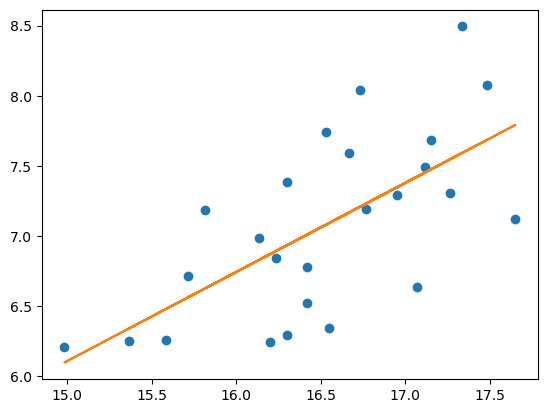

In [32]:
# The linear regression plot
plt.plot(wine_data["AGST"], wine_data["Price"], "o")
plt.plot(wine_data["AGST"], predicted)

In [33]:
print(sse(wine_data['Price'].to_numpy().reshape(-1,1), predicted))
print(mse(wine_data['Price'].to_numpy().reshape(-1,1), predicted))
print(rmse(wine_data['Price'].to_numpy().reshape(-1,1), predicted))
                   

5.734875147020113
0.22939500588080453
0.47895198703085523


In [38]:
# Linear regression with three features
lr_3 = LinearRegression(3)
X_3 = wine_data[['AGST', 'Age', 'HarvestRain']].to_numpy().reshape(-1,3)
lr_3.train(X_3, wine_data['Price'].to_numpy().reshape(-1,1))
predicted_3 = lr_3.predict(X_3)
print(sse(wine_data['Price'].to_numpy().reshape(-1,1), predicted_3))
print(mse(wine_data['Price'].to_numpy().reshape(-1,1), predicted_3))
print(rmse(wine_data['Price'].to_numpy().reshape(-1,1), predicted_3))

2.1312660907161134
0.08525064362864454
0.29197712860538333


### Computation Complexity of Normal Equation
To compute
$$ \mathbf w =  (\mathbf X ^\intercal \mathbf X)^{-1} \mathbf X ^\intercal \mathbf y$$
- $\mathbf X ^\intercal \mathbf X$: This is an $m\times n$ matrix, multiplied by its inverse, an $n\times m$ matrix. The complexity is $O(mn^2)$.
- $(\mathbf X ^\intercal \mathbf X)^{-1}$: We are inverting an $n\times n$ matrix. The complexity is $O(n^3)$.
- $(\mathbf X ^\intercal \mathbf X)^{-1} \mathbf X ^\intercal$: Matrix multiplication. $n \times n$ matrix times $n \times m$ matrix. The complexity is $O(mn^2)$
- $(\mathbf X ^\intercal \mathbf X)^{-1} \mathbf X ^\intercal \mathbf y$: $n \times m$ matrix times $m \times 1$ matrix. The complexity is $O(mn)$.

The computational time is very sensitive to $n$, the number of features. Especially in inverting the matrix, it has a cubic growth. Fortunately, we typically have very small matrices to invert. When using a small number of features, the complexity is linear to the sample size. 

### Feature Selection
It's easy to see that, by using more features, we will be able to achieve smaller error on the sample. However, the more feature we use, the more computation time we need. Later in this course we will also see, smaller error on the sample does not always mean we have a better model. We want to find out which features we should use to build our model, rather than all of them.

### $R^2$
Suppose we are not using any feature at all, the best prediction we can make will simply be the average (because mean minimizes sum of square differences). We call this prediction using average the *baseline model*, and the sum of square difference *total sum of squares* (*SST*). $$\mathrm{SST} = \sum_i^m (\bar y - y_i)^2$$
It's easy to see that the SST measures the total variation.

Now, by using a feature and building a linear regression with that feature, our prediction will have an SSE that is guaranteed to be no greater than the SST, usually smaller than the SST. That means some of the variation, previously unexplained in the baseline model, is now explained with the introduction of the feature. We quantifiy this using $R^2$ (*R2*, *R-Squared*, or the *coefficient of determination*):
$$R^2 = 1 - \frac{\mathrm{SSE}}{\mathrm{SST}}$$

$R^2$ captures value added from using a model
- $R^2 = 0$ means no improvement over baseline
- $R^2 = 1$ means all variation are now explained

It is also possible to calculate *partial $R^2$* that is the improvement a full(er) model over a reduced model.

Interpretation of $R^2$:
- "How much better the model is with the inclusion of the feature."
- "How much of the unexplained variance is now explained by the included feature."



### Linear Regression Using `scikit-learn` 

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = wine_data[['AGST']]
y = wine_data['Price']

reg = LinearRegression().fit(X,y)
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(X))

X_2 = wine_data[['AGST', 'Age']]
X_3 = wine_data[['AGST', 'Age', 'HarvestRain']]

reg_2 = LinearRegression().fit(X_2,y)
reg_3 = LinearRegression().fit(X_3,y)

print(reg_2.predict(X_2))
print(reg_3.predict(X_3))

[0.63509431]
-3.4177613134854603
[7.45295742 7.20946226 7.47410606 6.82840568 7.0083914  7.68578299
 7.0083914  7.59051885 6.9342759  6.56382539 7.54822157 6.34154238
 7.0824434  6.89191511 6.87076647 7.09304947 7.16716498 7.23067441
 6.09804722 7.4212027  6.9342759  7.3470872  7.79165321 6.47910381
 6.62733482]
[7.76314982 7.52165951 7.70493846 7.08127488 7.21516428 7.78996158
 7.16385906 7.65421281 7.04685676 6.69283134 7.53976205 6.44449118
 7.07558418 6.88104448 6.8366454  7.00802773 7.0480722  7.07871529
 6.0490852  7.19629716 6.73902544 7.07929486 7.44771213 6.25859634
 6.36433789]
[7.68480576 7.81872457 7.76342615 7.26284138 7.03913403 7.58178935
 6.52148419 8.12802031 7.48937498 6.68632664 7.75406881 5.94152723
 7.35889652 7.02888644 6.19635894 6.57542598 7.31593835 7.23969246
 6.05653988 7.29928055 6.58923059 6.96913465 6.97171882 6.57271736
 6.83525605]
